In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import multiprocessing
import scipy as sp
import matplotlib.image as mpimg


from scipy import optimize as op
plt.rcParams.update({
    "text.usetex": True,        
    "font.family": "serif",     
    "text.latex.preamble": r"\usepackage{amsmath}" 
})

/var/folders/hv/9y6y42xj1v9131vk1mkf581h0000gn/T/ipykernel_82344/353623993.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


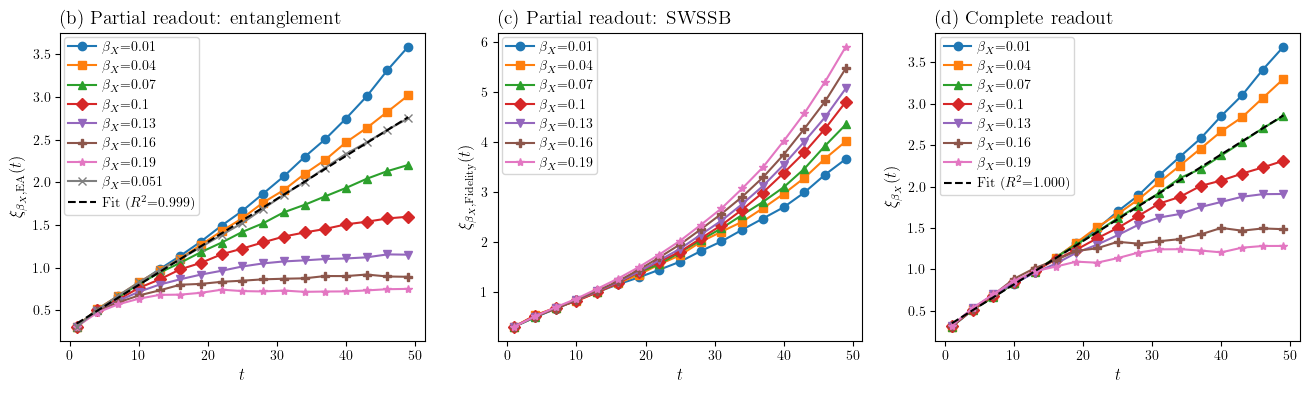

In [2]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4), gridspec_kw={'wspace': 0.2, 'hspace': 0.3})

# The first plot (b): In the partial readout case, the variation of the correlation length reflecting entanglement with the evolution depth for different X weak measurement strengths
markers2 = ['o', 's', '^', 'D', 'v', 'P', '*']

for i in range(7):
    t2 = np.round(i * 0.03 + 0.01, 2)
    name = "EV_Crit_1/" + "ZZX_EV_NoXM" + "+" + str(6) + "+" + str(0.1) + "+" + str(t2) + ".npy"
    EV = np.load(name)
    Para = []
    Dep = []
    for j in range(17):
        x = np.arange(1, 6)
        y = np.log(EV[j])
        Dep.append(j * 3 + 1)
        slope, intercept = np.polyfit(x, y, 1)
        Para.append(-1 / slope)
    axs[0].plot(Dep, Para, marker=markers2[i], markersize=6, linestyle='-', label=rf"$\beta_X$={t2}")

# Import the closest linear X weak measurement strength (t2=0.051), this value needs to be found after selecting a finer range of t2 values and simulating.
name = "EV_Crit_1/" + "ZZX_EV_NoXM" + "+" + str(6) + "+" + str(0.1) + "+" + str(0.051) + ".npy"
EV = np.load(name)
Para = []
Dep = []
for j in range(17):
    x = np.arange(1, 6)
    y = np.log(EV[j])
    Dep.append(j * 3 + 1)
    slope, intercept = np.polyfit(x, y, 1)
    Para.append(-1 / slope)
axs[0].plot(Dep, Para, marker='x', markersize=6, linestyle='-', label=rf"$\beta_X$={0.051}")
fit_Dep3 = np.array(Dep)
fit_Para3 = np.array(Para)

# Perform linear fitting for t2=0.051 and return the correlation coefficient

slope3, intercept3 = np.polyfit(fit_Dep3, fit_Para3, 1)
fit_line3 = slope3 * fit_Dep3 + intercept3
residuals3 = fit_Para3 - fit_line3
ss_res3 = np.sum(residuals3 ** 2)
ss_tot3 = np.sum((fit_Para3 - np.mean(fit_Para3)) ** 2)
r_squared3 = 1 - (ss_res3 / ss_tot3)
axs[0].plot(fit_Dep3, fit_line3, 'k--', label=rf'Fit ($R^2$={r_squared3:.3f})')


axs[0].legend(fontsize=10,loc='upper left', frameon=True, markerscale=1, borderpad=0.3, handletextpad=0.4, borderaxespad=0.3)
axs[0].set_xlabel(r'$t$', fontsize=12)
axs[0].set_ylabel(r'$\xi_{\beta_X,\text{EA}}(t)$', fontsize=12)
axs[0].set_title('(b) Partial readout: entanglement', fontsize=14, loc='left')

# Second plot (c): In the partial readout case, the variation of the correlation length reflecting SWSSB with the evolution depth for different X weak measurement strengths

markers2 = ['o', 's', '^', 'D', 'v', 'P', '*']
for i in range(7):
    t2 = np.round(i * 0.03 + 0.01, 2)
    name = "EV_Crit_1/" + "ZZX_FL_NoXM" + "+" + str(6) + "+" + str(0.1) + "+" + str(t2) + ".npy"
    EV = np.load(name)
    Para = []
    Dep = []
    for j in range(17):
        x_ = np.arange(1, 6)
        y_ = np.log(EV[j])
        Dep.append(j * 3 + 1)
        slope, intercept = np.polyfit(x_, y_, 1)
        Para.append(-1 / slope)
    axs[1].plot(Dep, Para, marker=markers2[i], ms=6, linestyle='-', label=rf"$\beta_X$={t2}")
axs[1].legend(fontsize=10, loc='upper left', frameon=True, markerscale=1, borderpad=0.3, handletextpad=0.4, borderaxespad=0.3)
axs[1].set_xlabel(r'$t$', fontsize=12)
axs[1].set_ylabel(r'$\xi_{\beta_X,\text{Fidelity}}(t)$', fontsize=12)
axs[1].set_title('(c) Partial readout: SWSSB', fontsize=14, loc='left')

# Third plot (d): In the complete readout case, the variation of the correlation length reflecting entanglement and SWSSB with the evolution depth for different X weak measurement strengths

fit_idx3 = 2  # The index of the X weak measurement strength corresponding to the best linear fit (t2=0.07)
fit_Dep3 = []
fit_Para3 = []
for i in range(7):
    t2 = np.round(i * 0.03 + 0.01, 2)
    name = "EV_Crit_0/" + "ZZX_EV" + "+" + str(6) + "+" + str(0.1) + "+" + str(t2) + ".npy"
    EV = np.load(name)
    Para = []
    Dep = []
    for j in range(17):
        x = np.arange(1, 6)
        y = np.log(EV[j])
        Dep.append(j * 3 + 1)
        slope, intercept = np.polyfit(x, y, 1)
        Para.append(-1 / slope)
    axs[2].plot(Dep, Para, marker=markers2[i], markersize=6, linestyle='-', label=rf"$\beta_X$={t2}")
    if i == fit_idx3:
        fit_Dep3 = np.array(Dep)
        fit_Para3 = np.array(Para)

# Perform linear fitting for t2=0.07
slope3, intercept3 = np.polyfit(fit_Dep3, fit_Para3, 1)
fit_line3 = slope3 * fit_Dep3 + intercept3
residuals3 = fit_Para3 - fit_line3
ss_res3 = np.sum(residuals3 ** 2)
ss_tot3 = np.sum((fit_Para3 - np.mean(fit_Para3)) ** 2)
r_squared3 = 1 - (ss_res3 / ss_tot3)
axs[2].plot(fit_Dep3, fit_line3, 'k--', label=rf'Fit ($R^2$={r_squared3:.3f})')

axs[2].legend(fontsize=10,loc='upper left', frameon=True, markerscale=1, borderpad=0.3, handletextpad=0.4, borderaxespad=0.3)
axs[2].set_xlabel(r'$t$', fontsize=12)
axs[2].set_ylabel(r'$\xi_{\beta_X}(t)$', fontsize=12)
axs[2].set_title('(d) Complete readout', fontsize=14, loc='left')

plt.tight_layout()
plt.savefig("6qubitSimul3Fig.pdf", bbox_inches='tight')
plt.show()
